Paridad PutCall
Introduce el precio del call: 10
Introduce el precio del bono: 100
Introduce el precio de la accion: 95
Introduce el precio del put: 26
La estrategia de arbitraje es la siguiente: Comprar call y bono y Vender put y accion


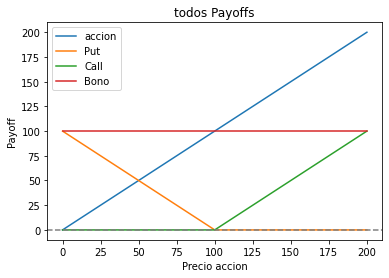

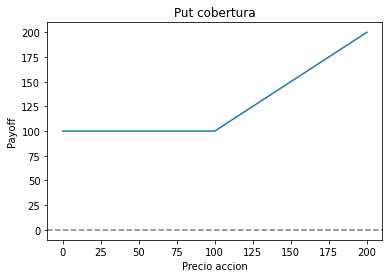

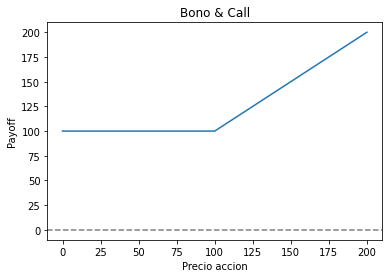

0


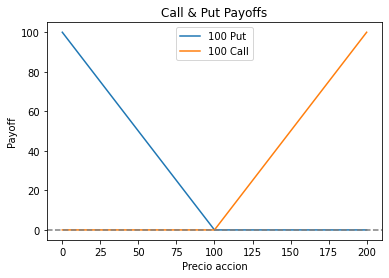

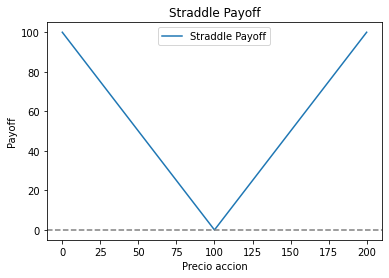

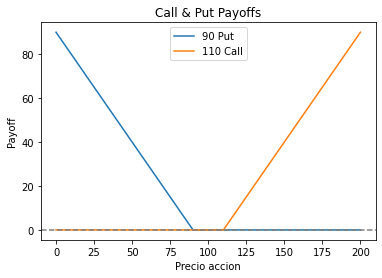

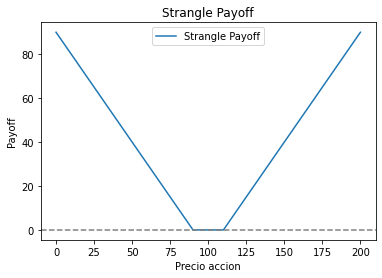

In [ ]:
#Práctica 5 paridad put call Jorge Cárdenas 
#Calculadora rápida de paridad
print("Paridad PutCall")
precio_call=int(input("Introduce el precio del call: "))
precio_bono=int(input("Introduce el precio del bono: "))
precio_accion=int(input("Introduce el precio de la accion: "))
precio_put=int(input("Introduce el precio del put: "))

if precio_call + precio_bono == precio_accion + precio_put:
  print(" No hay arbitraje porque hay paridad")

elif precio_call + precio_bono> precio_accion + precio_put:
  print("La estrategia de arbitraje es la siguiente: Comprar put y accion y Vender call y bono")

else:
  print("La estrategia de arbitraje es la siguiente: Comprar call y bono y Vender put y accion")




########Planteamiento teorico de la paridad PutCall#########################################
#primero importamos las librerias que vamos a necesitar, numpy, scipy, sympy y sympy stats
import numpy as np
import scipy as si
import sympy as sy
import sympy.stats as systats

#definimos la funcion de precio de las opciones
def put_option_price(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: Vencimiento
    #r: tanto instantabeo
    #sigma: volatilidad de las acciones

    S = float(S)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put_price = K * np.exp(-r * T) * si.stats.norm.cdf(-d2, 0.0, 1.0) - S * si.stats.norm.cdf(-d1, 0.0, 1.0)
    
    return put_price



########Planteamiento teorico de la paridad PutCall opciones A#########################################
#Combinamos 4 tipos de payoffs, una call con precio strike 100, opcion put con precio strike 100 y un bono con un payoff de 100 y acciones
#primero importamos las librerias que vamos a necesitar, numpy, pandas y matplotlib.pyplot para representar los graficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#creamos el esquema de precios necesarios, como vamos usar 100 para que los preios  

#creamos el esquema de 4 payoffs
#1. Bono  con precio 100
#2. Opcion put con strike price 100
#3.Opcion Call con strike price 100
#4. Acciones a precio 100




#creamos un dataframe de los payoffs

payoffs = pd.DataFrame(list(range(0,201)), columns=['accion'])
payoffs['Put'] = payoffs['accion'].apply(lambda x: max(0, 100-x))
payoffs['Call'] = payoffs['accion'].apply(lambda x: max(0, x-100))
payoffs['Bono'] = 100

#Graph all payoffs
ax = payoffs.plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title("todos Payoffs")
plt.show()


#Ahora consideramos un opcion put como cobertura
payoffs['Put cobertura'] = payoffs['accion'] + payoffs['Put']

ax = payoffs['Put cobertura'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title("Put cobertura")
plt.show()


#añadimos la opcion de bono y call que seria la parte izquierdad de nuestra ecuacion
payoffs['Bono & Call'] = payoffs['Bono'] + payoffs['Call']

ax = payoffs['Bono & Call'].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title('Bono & Call')
plt.show()


#Verificamos que los payoffs son los mismos
print(abs(payoffs['Bono & Call'] - payoffs['Put cobertura']).max())


#Payoffs de las opciones
payoffs = pd.DataFrame(list(range(0,201)), columns=['accion'])
payoffs['100 Put'] = payoffs['accion'].apply(lambda x: max(0, 100-x))
payoffs['100 Call'] = payoffs['accion'].apply(lambda x: max(0, x-100))

#Representamos graficamente el payoff de las opciones call y put
ax = payoffs[['100 Put', '100 Call']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title("Call & Put Payoffs")
plt.show()


#Calculamos el straddle payoff, el payoff straddle corto es similiar al de short strangle, el precio de ejercicio del call es mas alto que el precio de ejercicio de venta y, como resultado, se aplica el beneficio maximo para cualquier precio subyacente entre los dos precios del ejercicio
payoffs['Straddle Payoff'] = payoffs['100 Put'] + payoffs['100 Call']

#Representamos el straddle payoff
ax = payoffs[['Straddle Payoff']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title("Straddle Payoff")
plt.show()



#Payoffs opciones
payoffs = pd.DataFrame(list(range(0,201)), columns=['accion'])
payoffs['90 Put'] = payoffs['accion'].apply(lambda x: max(0, 90-x))
payoffs['110 Call'] = payoffs['accion'].apply(lambda x: max(0, x-110))

#Representamos el payoff del put y del call
ax = payoffs[['90 Put', '110 Call']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title("Call & Put Payoffs")
plt.show()


#Calculamos el strangle payoff
payoffs['Strangle Payoff'] = payoffs['90 Put'] + payoffs['110 Call']

#Representamos el straddle payoff
ax = payoffs[['Strangle Payoff']].plot(kind='line')
ax.axhline(0, linestyle='--', color='grey')
plt.xlabel('Precio accion')
plt.ylabel('Payoff')
plt.title("Strangle Payoff")
plt.show()


#Práctica 5 paridad put call Jorge Cárdenas 